In [454]:
sub_c1 = "../data/sub_c1.csv"
sub_c2 = "../data/sub_c2.csv"
sub_c3 = "../data/sub_c3.csv"
ep1 = "../data/sub_ep1.csv"
ep2 = "../data/sub_ep2.csv"
deb_c1 = "../data/prelev_c1.csv"
deb_c2 = "../data/prelev_c2.csv"
deb_c3 = "../data/prelev_c3.csv"
rch_zones = "../data/rch_zone.csv"
topo = "../data/topo.csv"



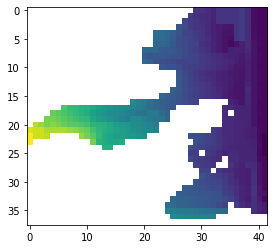

In [455]:
#1st layer
sub_c1 = pd.read_csv(sub_c1,sep=";",header=None,na_values=None)
sub_c1[sub_c1==7777]=None # remove nodata
plt.imshow(sub_c1)

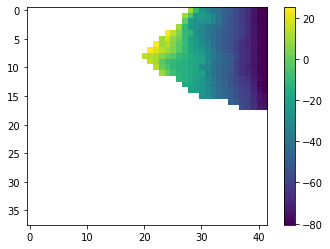

In [456]:
# 2nd layer
botm_c2 = pd.read_csv(sub_c2,sep=";",header=None,na_values=None)
botm_c2[botm_c2==7777]=None # remove nodata

plt.imshow(botm_c2)
plt.colorbar()

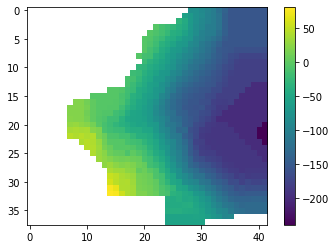

In [457]:
# third layer
botm_c3 = pd.read_csv(sub_c3,sep=";",header=None,na_values=None)
botm_c3[botm_c3==7777]=None
plt.imshow(botm_c3)
plt.colorbar()

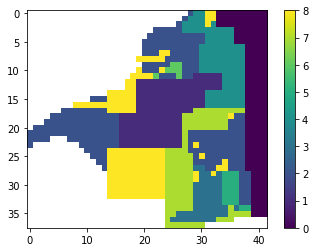

In [458]:
#rch zones
rch = pd.read_csv(rch_zones,sep=";",header=None,na_values=None)
rch[rch==7777]=None
plt.imshow(rch)
plt.colorbar()

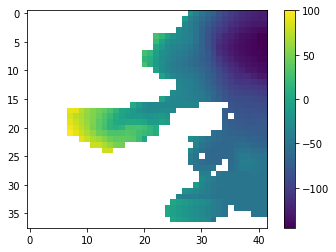

In [483]:
# load the clay layer's botm above the 3rd layer
epo1 = pd.read_csv(ep1,sep=";",header=None,na_values=None)
epo1[epo1==7777]=None # remove nodata
epo1[epo1==9999]=None # remove nodata
plt.imshow(epo1)
plt.colorbar()

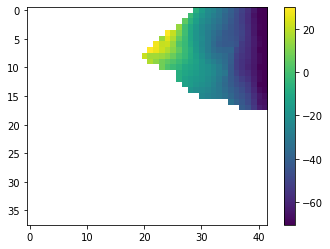

In [631]:
# load the clay layer's botm above the 2nd layer
epo2 = pd.read_csv(ep2,sep=";",header=None,na_values=None)
epo2[epo2==7777]=None # remove nodata
epo2[epo2==9999]=None # remove nodata
plt.imshow(epo2)
plt.colorbar()

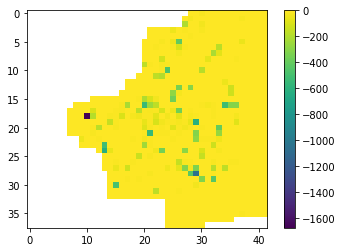

In [477]:
a = pd.read_csv(deb_c3,sep=";",header=None,na_values=None)
a[a==7777]=None # remove nodata
a[a==9999]=None # remove nodata
plt.imshow(a)
plt.colorbar()

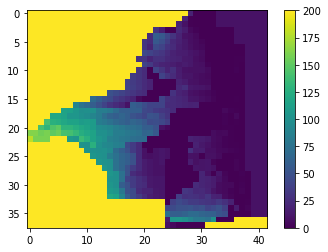

In [591]:
top = pd.read_csv(topo,sep=";",header=None)
#top[top==7777]=None # remove nodata
b=plt.imshow(top)
plt.colorbar(b)
b.set_clim(0,200)

In [495]:
idomain_1 = np.zeros([38,42])
idomain_2 = np.zeros([38,42])
idomain_3 = np.ones([38,42])*-1
idomain_4 = np.zeros([38,42])
idomain_5 = np.zeros([38,42])

In [612]:
idomain_1[sub_c1.notnull()] = 1
idomain_2[epo2.notnull()] = 1
idomain_3[botm_c2.notnull()] = 1
idomain_4[epo1.notnull()] = 1
idomain_5[botm_c3.notnull()] = 1

In [615]:
bot1 = top.copy()
bot1[pd.DataFrame(idomain_1!=1)] = top[pd.DataFrame(idomain_1!=1)] - 0.1
bot1[pd.DataFrame(idomain_1==1)] = sub_c1[pd.DataFrame(idomain_1==1)]

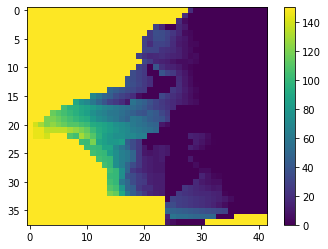

In [623]:
a=plt.imshow(bot1)
plt.colorbar(a)
a.set_clim(0,150)

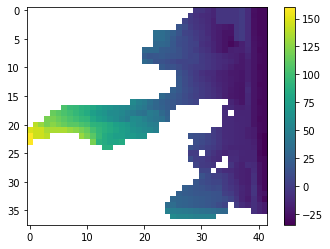

In [622]:
plt.imshow(sub_c1)
plt.colorbar()